`Q1. Explain GET and POST methods.`

In Flask, GET and POST are two commonly used HTTP methods for handling requests between clients (such as web browsers) and servers (such as Flask applications). Here's an explanation of each method:

1. GET method: The GET method is used to retrieve data from the server. When a client sends a GET request, it typically includes parameters in the URL itself or as query parameters. For example, if we have a URL like `http://example.com/search?query=flask`, the "query" parameter is passed to the server using the GET method. In Flask, we can handle GET requests using the `@app.route` decorator with the `methods` argument set to `['GET']`.

   Example:
   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/search', methods=['GET'])
   def search():
       query = request.args.get('query')

       return 'Search results for: ' + query
   ```

2. POST method: The POST method is used to send data to the server, typically through HTML forms or API requests. With POST requests, the data is sent in the body of the HTTP request, which is not visible in the URL. In Flask, you can handle POST requests using the `@app.route` decorator with the `methods` argument set to `['POST']`.

   Example:
   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/submit', methods=['POST'])
   def submit():
       name = request.form.get('name')
       email = request.form.get('email')
  
       return 'Thank you, ' + name + '! Your submission has been received.'
   ```

`Q2. Why is request used in Flask?`

The `request` object in Flask is a crucial component that allows you to access and interact with incoming client requests. It provides a range of functionalities to retrieve data from incoming requests, including form data, URL parameters, headers, cookies, and more. Here are some reasons why the `request` object is used in Flask:

1. Accessing request data: The `request` object allows us to access data submitted by clients through various methods, such as GET or POST requests. It provides methods like `request.args`, `request.form`, and `request.json` to retrieve data from URL query parameters, form fields, and JSON payloads, respectively.

2. Handling file uploads: Flask supports file uploads, and the `request` object provides convenient methods for accessing and handling uploaded files. We can use `request.files` to retrieve uploaded files, iterate over them, save them to the server, or perform additional processing.

3. Retrieving request information: The `request` object provides access to various details about the incoming request, such as the URL, HTTP method, headers, cookies, and user agent.

4. Handling cookies: Cookies are an essential part of web applications for storing session data or maintaining user preferences. The `request` object allows you to retrieve and manipulate cookies through the `request.cookies` attribute.

`Q3. Why is redirect() used in Flask?`

The `redirect()` function in Flask is used to perform HTTP redirects, which are essential for redirecting users from one URL to another. It allows us to respond to a client's request by instructing their browser to make a new request to a different URL. Here are some reasons why `redirect()` is used in Flask:

1. Changing URL after form submission: When a user submits a form, it is common to redirect them to a different page to display a success message or prevent duplicate form submissions. By using `redirect()`, we can respond to the form submission with a redirect instruction, sending the user to a designated URL where we can present the appropriate response or perform additional actions.

2. Implementing URL routing: In Flask, you define routes using the `@app.route` decorator. Sometimes, we may want to define different routes for similar content or dynamically generated URLs. With `redirect()`, we can redirect a route to another route or URL, allowing us to define logical and user-friendly URL structures.

3. Handling authentication and authorization: Redirects are commonly used in authentication and authorization workflows. For example, if a user tries to access a protected resource without being authenticated, we can redirect them to a login page using `redirect()` and then bring them back to the original resource after successful authentication.

4. Handling SEO-friendly URLs: Search engine optimization (SEO) is an important aspect of web development.

`Q4. What are templates in Flask? Why is the render_template() function used?`

Templates in Flask are files that contain dynamic content and HTML markup, allowing us to separate the presentation logic from the application logic. They provide a convenient way to generate HTML pages dynamically by combining static content with dynamically generated data.

The `render_template()` function in Flask is used to render and return a template as an HTTP response. It takes a template file as input, along with any necessary data or variables, and generates the final HTML page based on the template's structure and the provided data.

Here are a few reasons why `render_template()` is used in Flask:

1. Separation of concerns: Templates allow us to separate the presentation logic (HTML structure, CSS styles, etc.) from the application logic (data processing, business rules, etc.). This separation enhances code readability, maintainability, and reusability.

2. Dynamic content generation: By using `render_template()`, we can pass data from our Flask application to the template. The template engine then processes the template and replaces the template variables or tags with the actual data, allowing us to generate dynamic content based on the current application state or user input.

3. Code reusability: Templates can be reused across multiple pages or views within our Flask application. With `render_template()`, we can easily render the same template with different data in different contexts, reducing code duplication and promoting modular design.

4. HTML page generation: The primary purpose of `render_template()` is to generate the final HTML page that will be sent back to the client's web browser.

Example usage of `render_template()` in Flask:
```python
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    title = 'Welcome to my Flask App'
    return render_template('home.html', title=title)
```

`Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.`

``` python
from flask import Flask, jsonify, request

app = Flask(__name__)

movies = [
    {'id': 1, 'title': 'The Shawshank Redemption', 'genre': 'Drama'},
    {'id': 2, 'title': 'Inception', 'genre': 'Sci-Fi'},
    {'id': 3, 'title': 'The Dark Knight', 'genre': 'Action'},
    {'id': 4, 'title': 'Pulp Fiction', 'genre': 'Crime'},
    {'id': 5, 'title': 'The Matrix', 'genre': 'Sci-Fi'}
]

@app.route('/movies', methods=['GET'])
def get_movies():
    return jsonify(movies)

# Route for retrieving a specific movie by ID
@app.route('/movies/<int:movie_id>', methods=['GET'])
def get_movie(movie_id):
    movie = next((m for m in movies if m['id'] == movie_id), None)
    if movie:
        return jsonify(movie)
    return jsonify({'error': 'Movie not found'}), 404

# Route for recommending movies based on genre
@app.route('/movies/recommend', methods=['GET'])
def recommend_movies():
    genre = request.args.get('genre')
    if not genre:
        return jsonify({'error': 'Genre parameter is required'}), 400

    recommended_movies = [m for m in movies if m['genre'].lower() == genre.lower()]
    return jsonify(recommended_movies)

if __name__ == '__main__':
    app.run("0.0.0.0")
```
`Output`
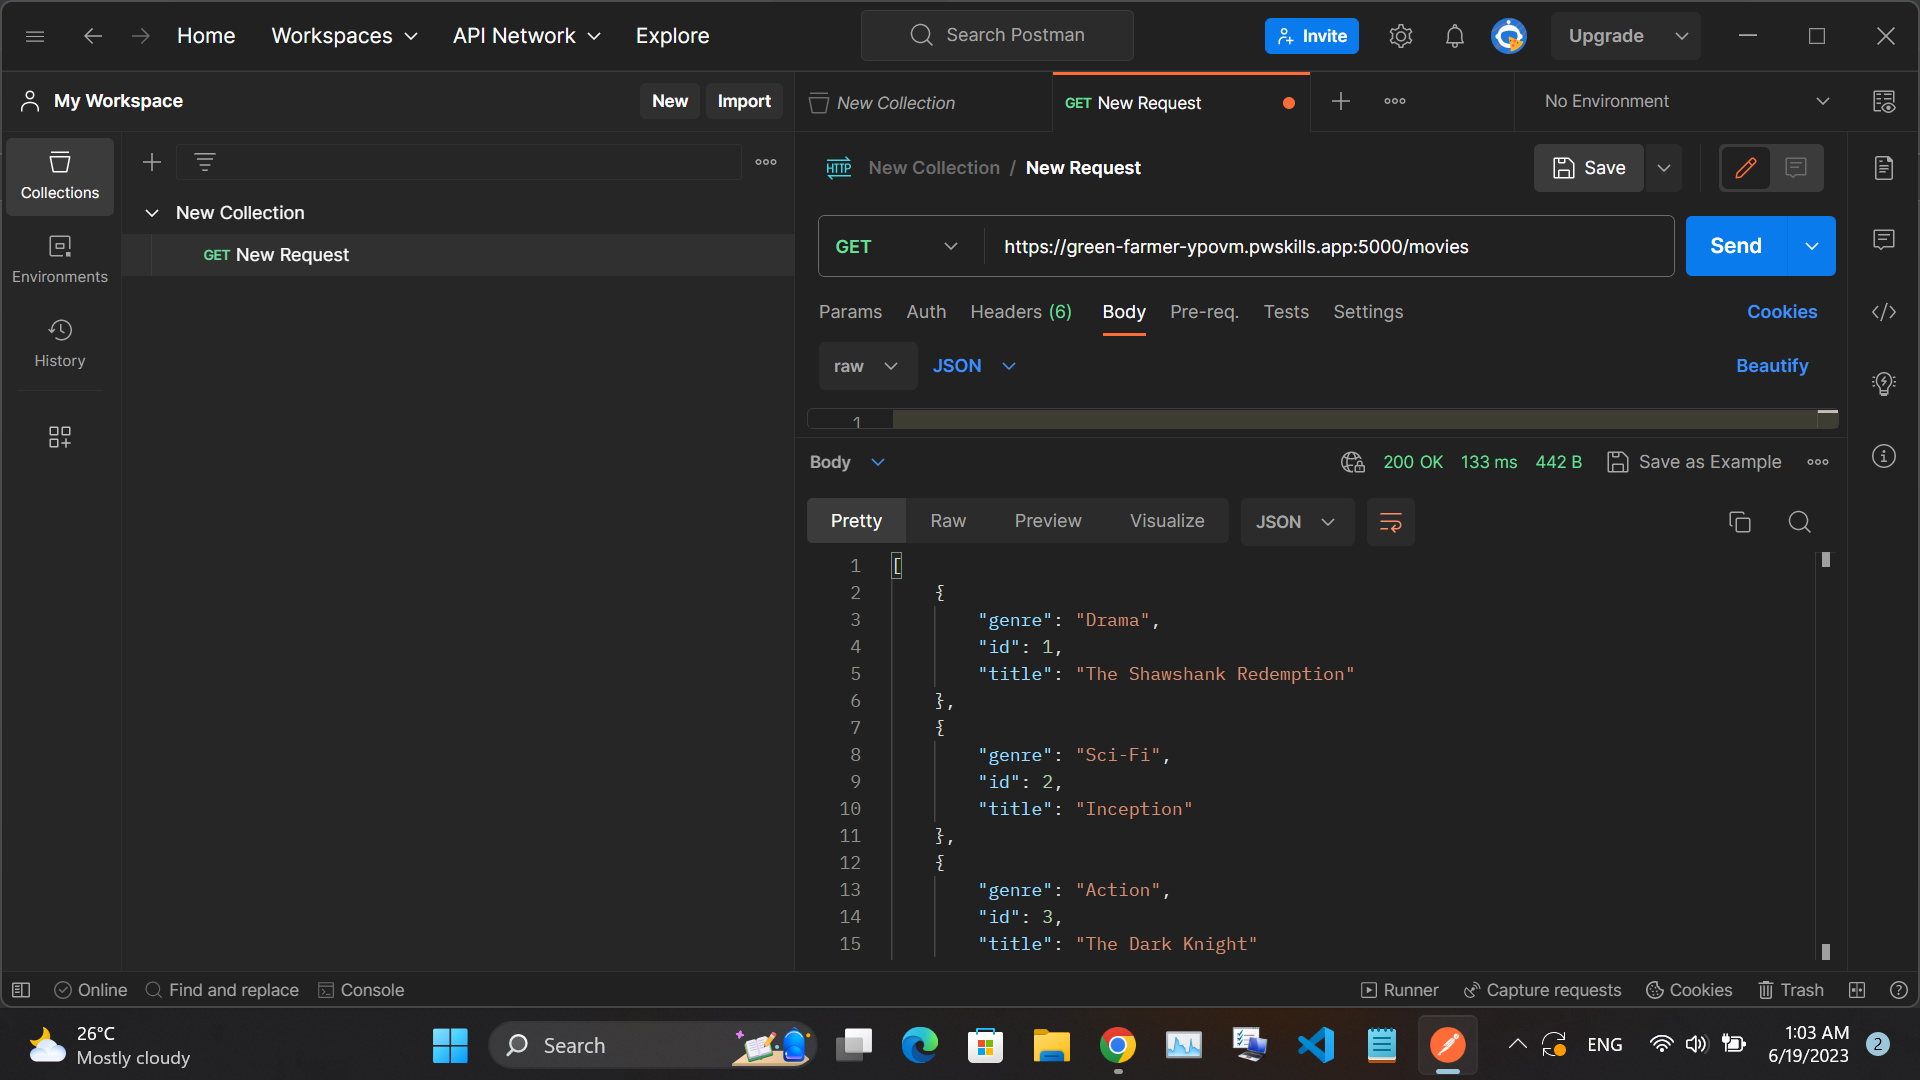
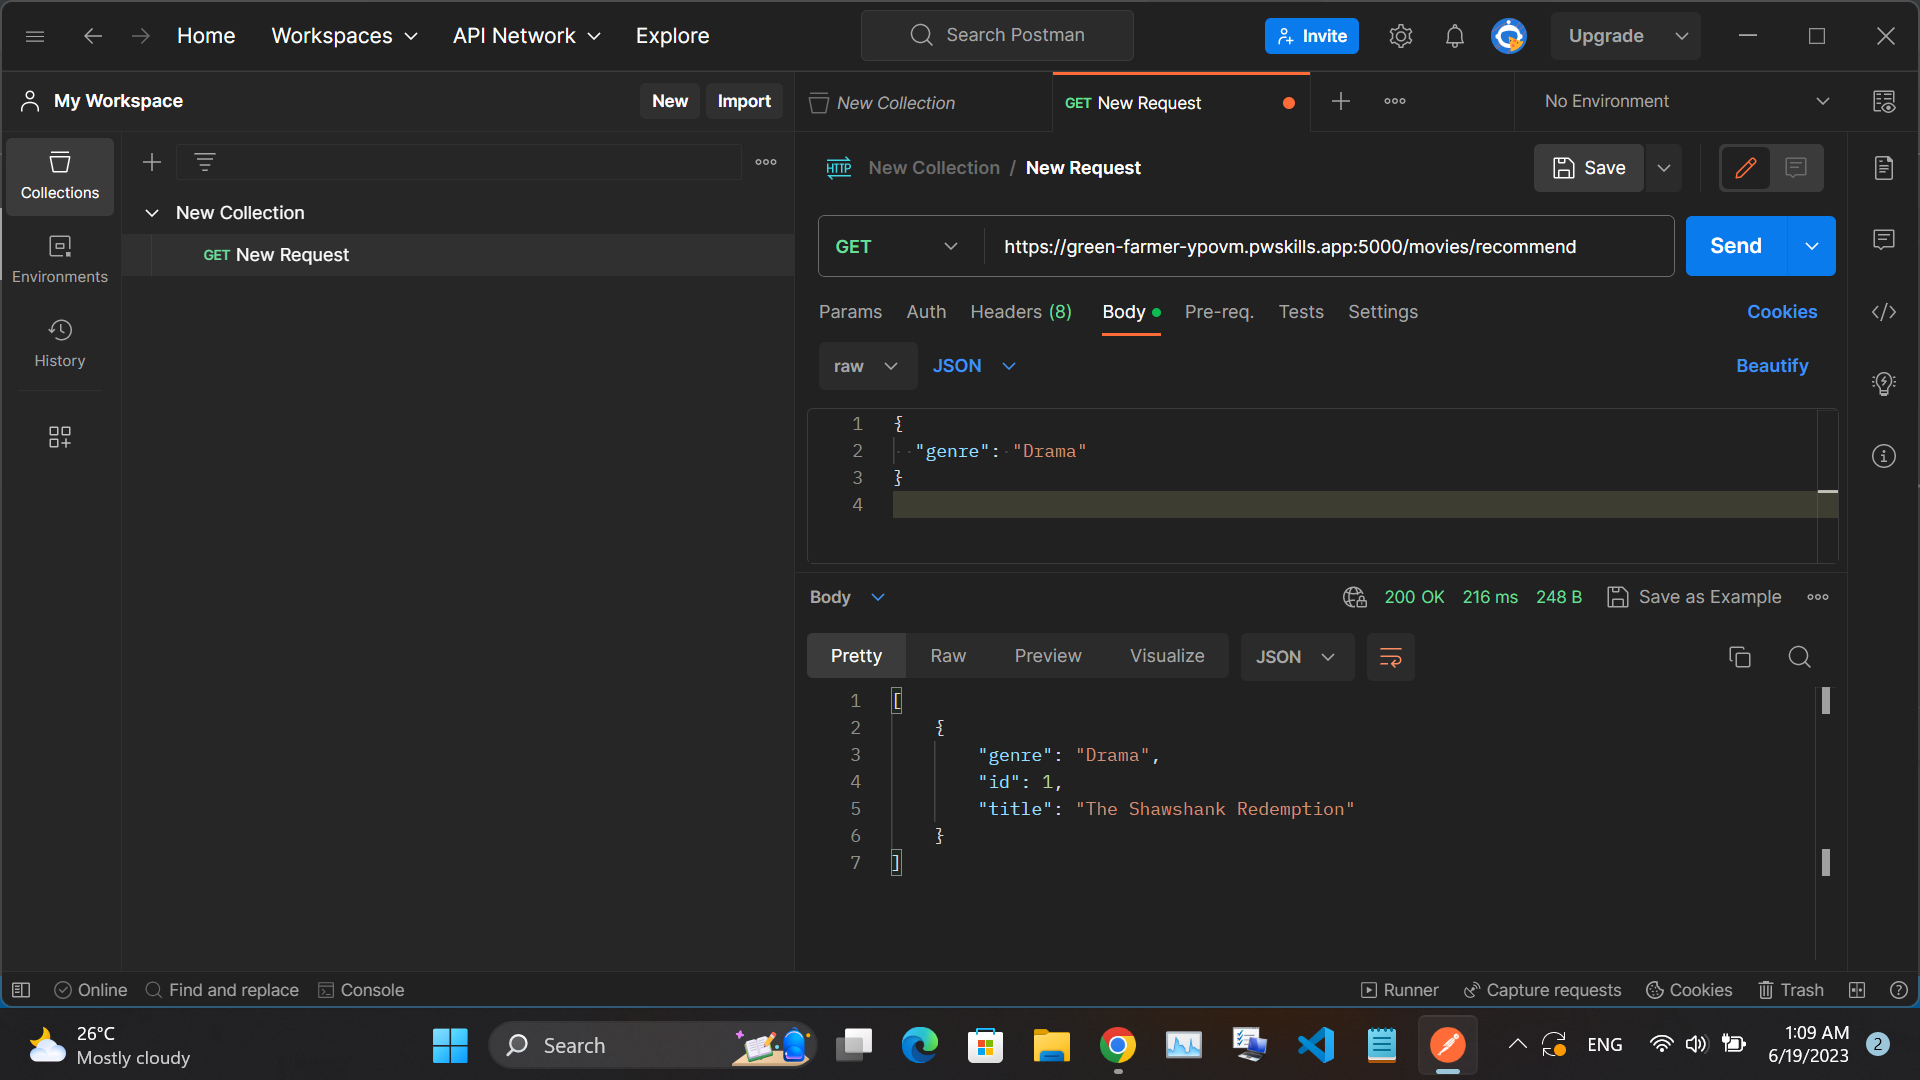